In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("bitcoin_price_Training.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])


In [8]:
df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month_name()

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",2017,July
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2017,July
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2017,July
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2017,July
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2017,July


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
 7   Year        1556 non-null   int64         
 8   Month       1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 109.5+ KB


In [11]:
# Replace '-' with NaN
df['Volume'] = df['Volume'].replace('-', pd.NA)

# Remove commas or other non-numeric characters (if any)
df['Volume'] = df['Volume'].str.replace(',', '', regex=False)

# Convert to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')


In [12]:
# Remove commas or other non-numeric characters (if any)
df['Market Cap'] = df['Market Cap'].str.replace(',', '', regex=False)

# Convert to numeric
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')

In [13]:
print(df['Volume'].dtypes)

print(df['Market Cap'].dtypes)

float64
int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1313 non-null   float64       
 6   Market Cap  1556 non-null   int64         
 7   Year        1556 non-null   int64         
 8   Month       1556 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 109.5+ KB


In [15]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,45535800000,2017,July
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,44890700000,2017,July
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,46246700000,2017,July
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,44144400000,2017,July
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,41816500000,2017,July


In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Year',
       'Month'],
      dtype='object')

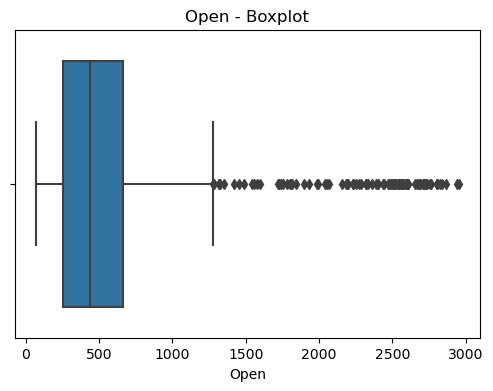

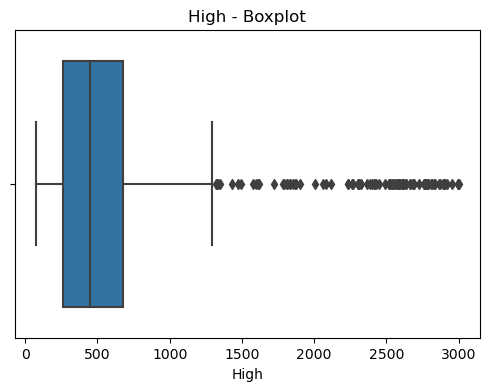

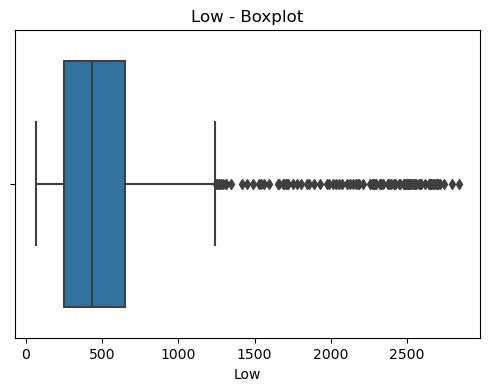

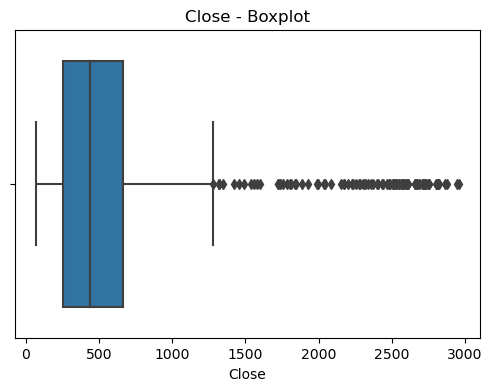

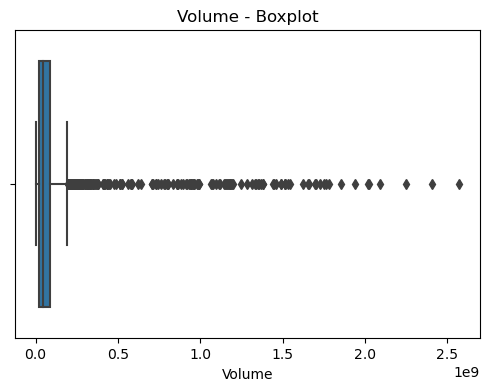

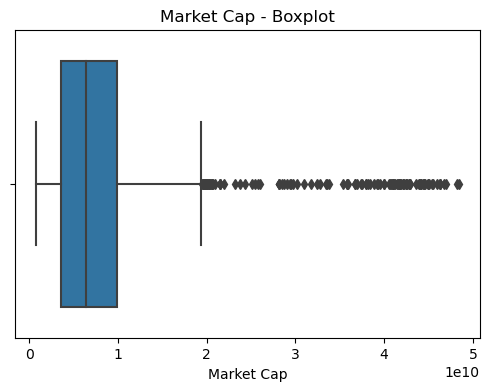

In [17]:
cont_col = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

for i in cont_col:
    plt.figure(figsize=(6, 4))  # Optional: makes plots a bit bigger
    sns.boxplot(x=df[i])
    plt.title(f'{i} - Boxplot')  # Use f-string to format title
    plt.show()


---------------

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Year,Month
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,45535800000,2017,July
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,44890700000,2017,July
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,46246700000,2017,July
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,44144400000,2017,July
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,41816500000,2017,July


### 1. Analyse change of price in bitcoin overtime


In [19]:
# Set the Timestamp column as the index
df.set_index('Date', inplace=True)


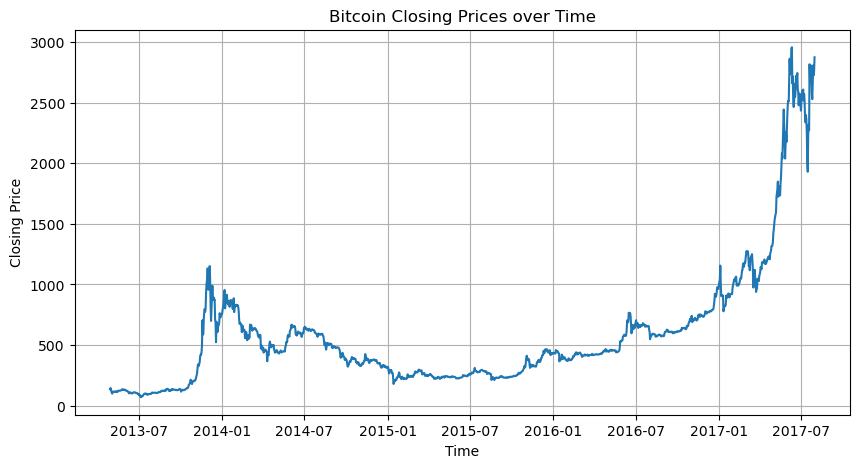

In [22]:
# Plot 1: Line chart of Bitcoin closing prices over time

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

## 2. Analysing bitcoin prices using candle stick chart



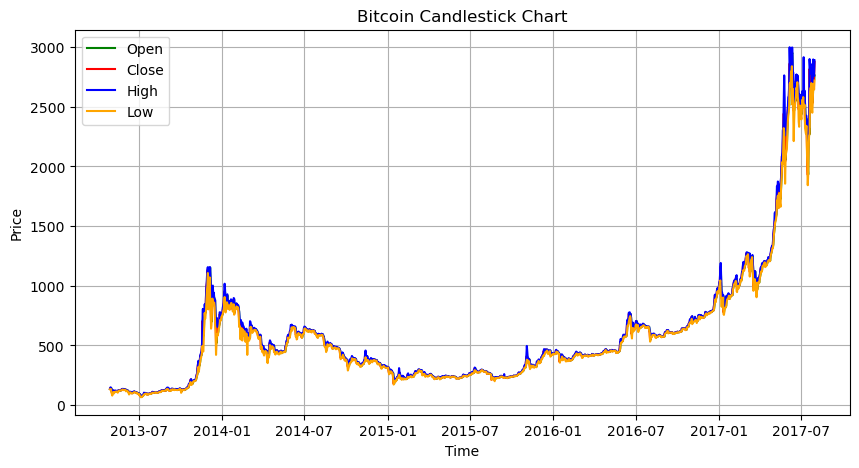

In [23]:
# Plot 2: Candlestick chart of Bitcoin prices

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### 3. Analysing closing price in depth



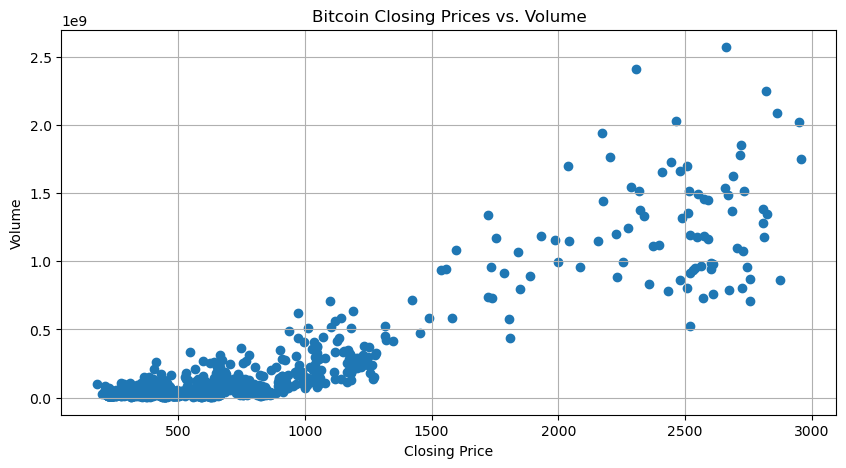

In [38]:
# Plot 3: Scatter plot of Bitcoin closing prices and volume

plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


### 4. Perform analysis on closing price on yearly, quarterly and monthly basis



**Yearly Closing Price Analysis**

In [37]:
yearly = df['Close'].resample('Y').agg(['mean', 'min', 'max', 'last'])
yearly.index = yearly.index.year  
print("Yearly Closing Price Summary:")
print(yearly)


Yearly Closing Price Summary:
             mean     min      max     last
Date                                       
2013   257.474476   68.43  1151.17   754.01
2014   527.236658  310.74   953.29   320.19
2015   272.453260  178.10   465.32   430.57
2016   568.492131  364.33   975.92   963.74
2017  1628.622123  777.76  2958.11  2875.34


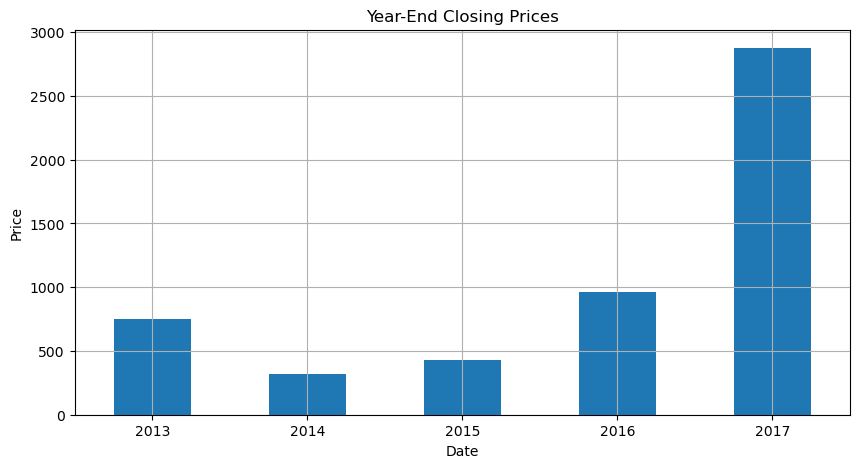

In [38]:
yearly['last'].plot(kind='bar', figsize=(10, 5), title='Year-End Closing Prices')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


**Quarterly Closing Price Analysis**

In [39]:
quarterly = df['Close'].resample('Q').agg(['mean', 'min', 'max', 'last'])
quarterly.index = quarterly.index.to_period('Q')  
print("Quarterly Closing Price Summary:")
print(quarterly.head())


Quarterly Closing Price Summary:
              mean     min      max    last
Date                                       
2013Q2  115.162188   94.65   144.54   96.61
2013Q3  111.291196   68.43   138.34  133.00
2013Q4  502.657609  114.13  1151.17  754.01
2014Q1  700.586000  457.00   953.29  457.00
2014Q2  520.929341  365.18   667.61  639.80


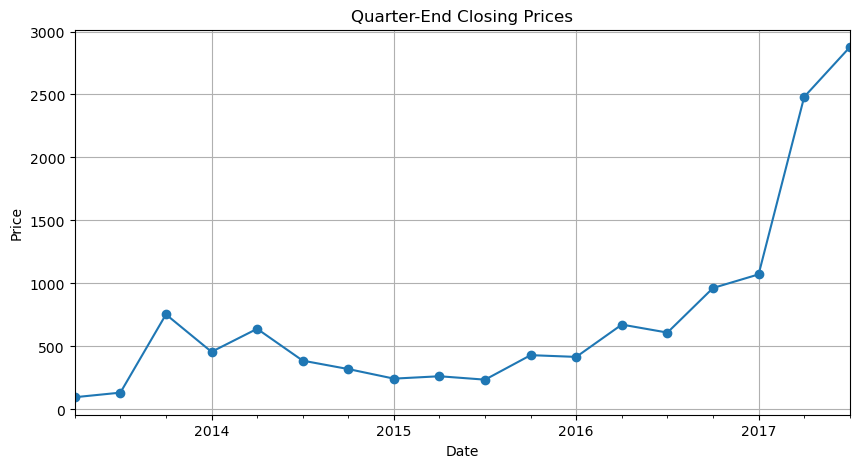

In [40]:
quarterly['last'].plot(figsize=(10, 5), marker='o', title='Quarter-End Closing Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**Monthly Closing Price Analysis**

In [41]:
monthly = df['Close'].resample('M').agg(['mean', 'min', 'max', 'last'])
monthly.index = monthly.index.to_period('M')
print("Monthly Closing Price Summary:")
print(monthly.tail())


Monthly Closing Price Summary:
                mean      min      max     last
Date                                           
2017-03  1129.365484   937.52  1274.99  1071.79
2017-04  1206.641000  1080.50  1347.89  1347.89
2017-05  1895.383548  1421.60  2443.64  2286.41
2017-06  2636.204333  2407.88  2958.11  2480.84
2017-07  2519.418387  1929.82  2875.34  2875.34


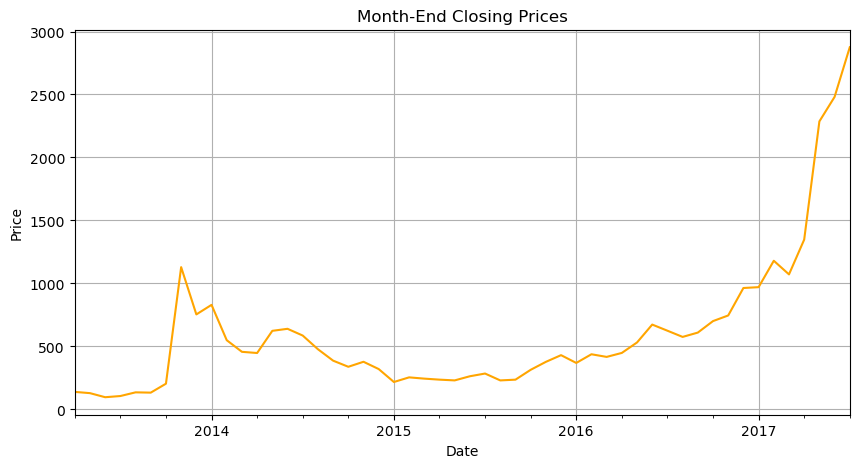

In [42]:
monthly['last'].plot(figsize=(10, 5), color='orange', title='Month-End Closing Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**Compare Trends**

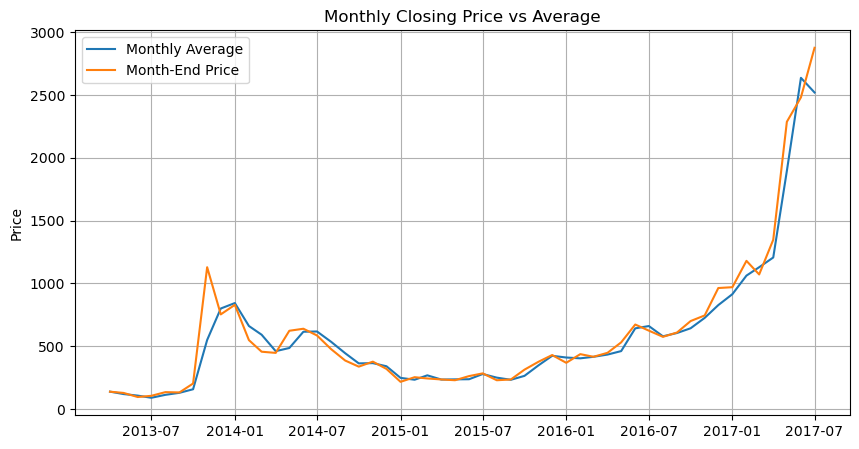

In [44]:
# Compare the average vs final price over different periods

plt.figure(figsize=(10, 5))
plt.plot(monthly.index.to_timestamp(), monthly['mean'], label='Monthly Average')
plt.plot(monthly.index.to_timestamp(), monthly['last'], label='Month-End Price')
plt.legend()
plt.title('Monthly Closing Price vs Average')
plt.ylabel('Price')
plt.grid(True)
plt.show()


### 5. Analysing daily change in price of stocks

**Calculate Daily Price Change (Absolute & Percentage)**

In [45]:
# Absolute daily change in price
df['Daily Change'] = df['Close'].diff()

# Percentage daily change
df['Daily Change (%)'] = df['Close'].pct_change() * 100


**Visualize Daily Percentage Change**

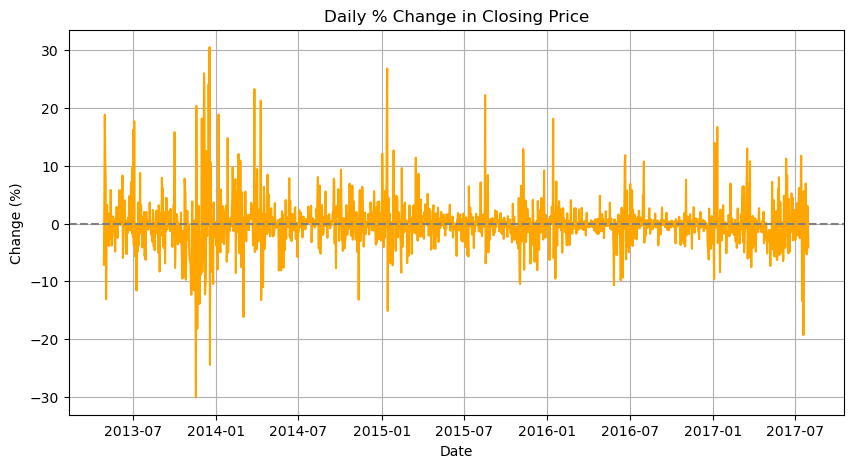

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Daily Change (%)'], color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Daily % Change in Closing Price')
plt.xlabel('Date')
plt.ylabel('Change (%)')
plt.grid(True)
plt.show()
